# Set up enviroment

In this lab and in subsequent labs, we will use Jupyter Notebook. To run code in Jupyter Notebook, you need a kernel, which interacts with the code you write and provides the execution environment. You should create a virtual environment and select it as the kernel for your Jupyter Notebook.

Furthermore, to manage dependencies and maintain project isolation in Python development, it is essential to use a virtual environment. You can create a virtual environment using either `venv`, which is included with Python, or `Miniconda/Anaconda`.

## Virtual enviroment using python

If you choose this method, make sure that Python is already installed on your system.

1. **Create a Virtual Python Environment**

    Create a virtual environment named `myenv`.
    ```bash
    python3 -m venv myenv
    ```

2. **Active/Deactive your virtual enviroment**

    To start using your new environment, activate it with:
    
    - **Windown:**

        ```bash
        myenv\Scripts\activate
        ```
    - **macOS/Linux:**
    
        ```bash
        source myenv/bin/activate
        ```

    When you are done using the virtual environment, you can deactivate it by simply typing:
    
    ```bash
    deactivate
    ```
3. **Install packages**

    To install packages in your virtual environment, make sure it is activated first, then run:

    ```bash
    pip install package-name
    ```

    Example:
    ```bash
    pip install numpy
    ```


## Miniconda/Anaconda
**Miniconda/Anaconda** provides a platform for managing Python packages, creating isolated environments, and simplifying the setup of a data science and machine learning workflow. You need to make sure that Miniconda/Anaconda already be installed on your system befor start.

1. **Create a New Conda Environment:**

    Use the `conda create` command followed by `--name` to specify the name of the environment and optionally specify the Python version.

    ```bash
    conda create --name myenv python=3.10
    ```
    This command will create a new Conda environment named `myenv` and install `Python 3.10` in that environment. 

2. **Activate/Deactive the Environment**

    To start using your new environment, activate it with:

    ```bash
    conda activate myenv
    ```

    When you’re done working in the environment, you can deactivate it with:

    ```bash
    conda deactivate
    ```

3. **Install Packages**

    Once the environment is activated, you can install packages using conda install or pip. For example:

    ```bash
    conda install numpy package-name
    ```

## Select kernel

When you have successfully created your virtual environment, you can choose it as the notebook kernel. In Jupyter Notebook (or in VSCode with Jupyter integration), use the `Select Kernel` option located at the top right of the notebook interface to select your environment.

In this lab, we will use `venv` from python.

# Install library

You can install each package sequentially by activating your `venv` and running:

```bash
pip install package-name
```

Alternatively, you can list all the packages you need in a file, usually named `requirements.txt`, and install them all at once by running:
```bash
pip install -r requirements.txt
```

Here is the list of packages required for this lab, which should be included in the `requirements.txt` file:
```
ipykernel-6.29.5
librosa-0.10.2.post1
matplotlib-3.9.1.post1
```
This version includes the proper `==` operator for specifying exact package versions and clarifies the usage of `requirements.txt`.

# File audio with Librosa

`librosa` is a powerful Python library for audio and music analysis. It provides tools for analyzing, processing, and visualizing audio signals, making it a popular choice among researchers and developers in the fields of music information retrieval and audio signal processing. 

Audios can be presented in different computer-readable formats such as:

- Wav (Waveform Audio File) format
- WMA (Windows Media Audio) format
- mp3 (MPEG-1 Audio Layer 3) format.

## Import Librosa

In [1]:
import librosa

## Loadfile

In [2]:
# %loading the audio with librosa
data, sampling_rate = librosa.load('./source.wav')

To listen the audio we have loaded with librosa, we typically use other libraries like `IPython.display` for playback. Here's an example:

In [4]:
import IPython.display as ipd

# Load audio file
audio_path = './source.wav'
data, sampling_rate = librosa.load(audio_path)

# Play audio
ipd.Audio(data, rate=sampling_rate)

## Extract audio properties: 

You can extract various properties of the audio signal. Here are some common properties you might want to extract.

1. **Duration:** Calculate the duration of the audio file.

In [6]:
duration = librosa.get_duration(y=data, sr=sampling_rate)
print(f'Duration: {duration} seconds')

Duration: 8.187528344671202 seconds


2. **Sampling Rate:** The number of samples per second.

In [7]:
print(f'Sampling Rate: {sampling_rate} Hz')

Sampling Rate: 22050 Hz


3. **Number of Samples:** The total number of samples in the audio signal.


In [8]:
num_samples = len(data)
print(f'Number of Samples: {num_samples}')

Number of Samples: 180535


4. **Resample the audio:** Use librosa.resample to resample the audio signal to the target sampling rate.

In [9]:
target_sr = 16000  # Example target sampling rate
y_resampled = librosa.resample(data, orig_sr=sampling_rate, target_sr=target_sr)

## Plot waveform

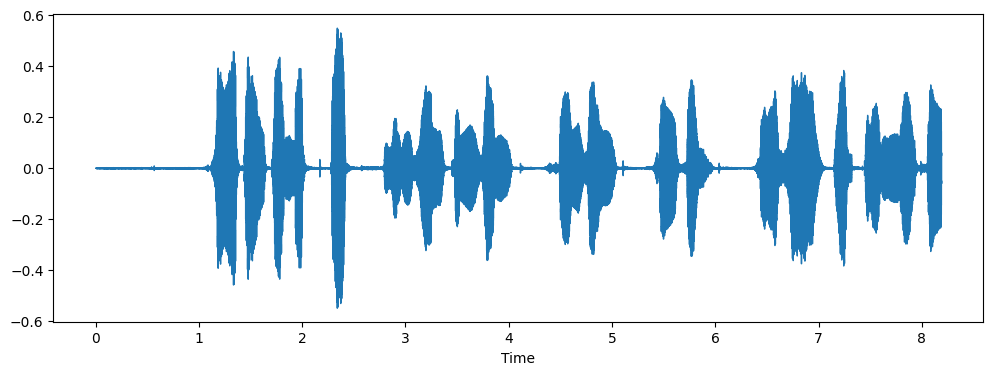

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()